In [21]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from ipywidgets import interact
from PIL import Image

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2)
model.evaluate(x_test, y_test)

Epoch 1/2
60000/60000 [==============================] - 10s 170us/step - loss: 0.2195 - acc: 0.9354
Epoch 2/2
10000/10000 [==============================] - 0s 38us/step


[0.08652941652378067, 0.97170000000000001]

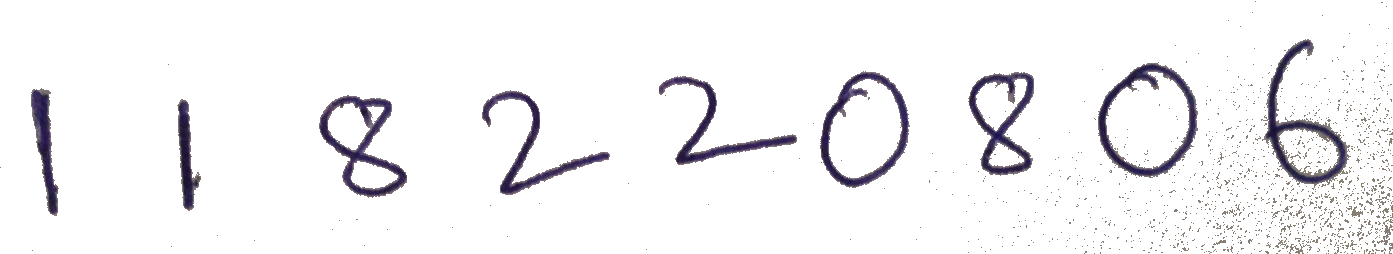

In [27]:
image = Image.open("std_num_2.png")
image

In [29]:
@interact(left=(0, image.size[0]-2), top=(0, image.size[1]-2), right=(0,image.size[0]-2),
          bottom=(0, image.size[1]-2))
def cropImage(fileName="cropped.png", left=0, top=0, right=image.size[0], bottom=image.size[1]):
    croppedImage = image.crop([left, top, right, bottom])
    plt.close()
    plt.imshow(croppedImage)
    croppedImage.save(fileName)
    plt.show()

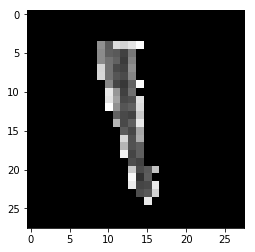

In [61]:
digit = Image.open("cropped.png").resize((28,28))
plt.imshow(digit)
# convert to greyscale
#digit = np.array(digit.convert("L"))
#plt.imshow(digit, cmap="binary")
#digit = np.array(digit)
#digit = np.array(digit.thumbnail((28,28), Image.ANTIALIAS))
digit = np.array(digit.convert("L"))
# scale to values between 0 and 1
digit = (np.max(digit) - digit) / (np.max(digit) - np.min(digit))
plt.imshow(digit, cmap="binary")

#digit[digit<0.8] = 0
plt.imshow(digit, cmap="binary")

In [57]:
digit.size

784

In [52]:
# Predict the digit in the student number
predict_array = model.predict(np.reshape(digit, (1,digit.shape[0], digit.shape[1])),
                    verbose=1)
predict_array
print("Digit recognized = ", output_labels[np.argmax(predict_array)])
#print("Digit recognized = ", np.argmax(predict_array))
predict_array

ValueError: cannot reshape array of size 3136 into shape (1,28,28)